<a href="https://colab.research.google.com/github/pranav168/Brain-Tumor-Detection-Model/blob/main/Brain_Tumor_Detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np # linear algebra
import pandas as pd 
import os
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import  normalize
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
import glob
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
import shutil
import random
import matplotlib.pyplot as plt
import cv2
np.random.seed(42)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
vgg_model=tf.keras.applications.mobilenet.MobileNet()

17235968/17225924 [==============================] - 1s 0us/step


In [5]:
train_path='/content/drive/MyDrive/Brain_tumor/train'
test_path='/content/drive/MyDrive/Brain_tumor/test'
valid_path='/content/drive/MyDrive/Brain_tumor/valid'
train_batch= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory=train_path, target_size=(64,64), classes=['no','yes'],batch_size=10)
test_batch= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory=test_path, target_size=(64,64), classes=['no','yes'],batch_size=10, shuffle=False)
valid_batch= ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
  .flow_from_directory(directory=valid_path, target_size=(64,64), classes=['no','yes'],batch_size=10)


Found 2400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

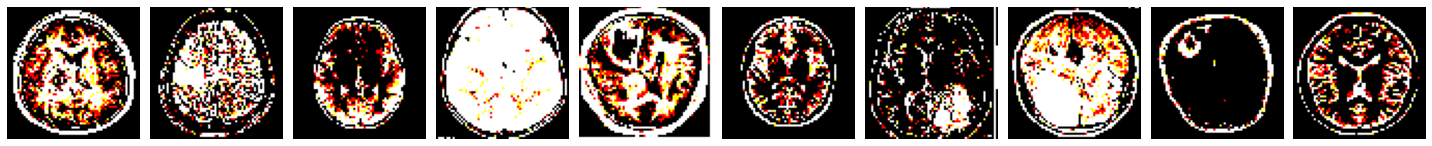

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [6]:
assert train_batch.n ==2400
assert test_batch.n ==200
assert valid_batch.n==400
imgs,lables=next(train_batch)
def plotImages(images_arr):
  fig, axes= plt.subplots(1,10,figsize=(20,20))
  axes= axes.flatten()
  for img, ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
plotImages(imgs)
print(lables)




In [7]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(64,64,3)),
    MaxPooling2D(pool_size=(2,2), strides=1),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2),strides=1),
    Flatten(),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])  
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                7872544   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6

In [8]:
decay_learning= tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9,
)
adam=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'],)

In [10]:
model.fit(x=train_batch, validation_data=valid_batch, epochs=25, verbose=2)

Epoch 1/25
240/240 - 719s - loss: 0.4454 - accuracy: 0.8813 - val_loss: 0.4092 - val_accuracy: 0.8850
Epoch 2/25
240/240 - 11s - loss: 0.3090 - accuracy: 0.9446 - val_loss: 0.3449 - val_accuracy: 0.9250
Epoch 3/25
240/240 - 11s - loss: 0.2296 - accuracy: 0.9638 - val_loss: 0.2737 - val_accuracy: 0.9400
Epoch 4/25
240/240 - 11s - loss: 0.1691 - accuracy: 0.9787 - val_loss: 0.2362 - val_accuracy: 0.9475
Epoch 5/25
240/240 - 11s - loss: 0.1270 - accuracy: 0.9892 - val_loss: 0.2320 - val_accuracy: 0.9550
Epoch 6/25
240/240 - 11s - loss: 0.0958 - accuracy: 0.9950 - val_loss: 0.2161 - val_accuracy: 0.9400
Epoch 7/25
240/240 - 11s - loss: 0.0775 - accuracy: 0.9950 - val_loss: 0.2260 - val_accuracy: 0.9525
Epoch 8/25
240/240 - 11s - loss: 0.0633 - accuracy: 0.9967 - val_loss: 0.2041 - val_accuracy: 0.9500
Epoch 9/25
240/240 - 11s - loss: 0.0541 - accuracy: 0.9962 - val_loss: 0.2222 - val_accuracy: 0.9600
Epoch 10/25
240/240 - 11s - loss: 0.0465 - accuracy: 0.9967 - val_loss: 0.2021 - val_accur

In [11]:
history=model.history.history
for i in history.keys():
  print(i)

loss
accuracy
val_loss
val_accuracy


In [12]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

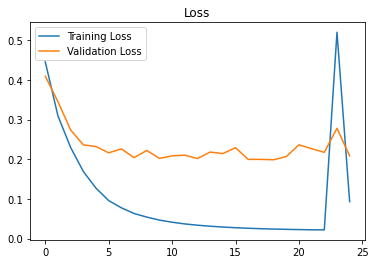

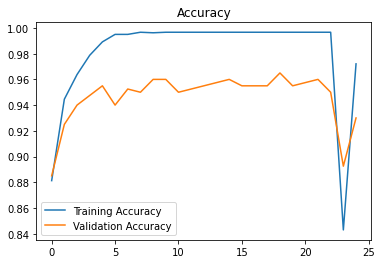

In [13]:
plot_metrics(history)


In [14]:
predictions=model.predict(test_batch)

In [15]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

[Text(0, 0.5, 'No-Brain Tumor'), Text(0, 1.5, 'Brain Tumor')]

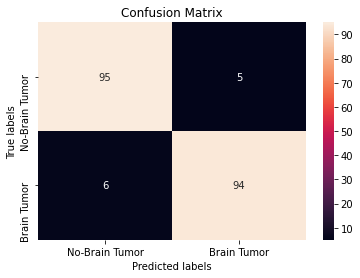

In [28]:
cm=confusion_matrix(y_pred=np.argmax(predictions, axis=-1), y_true=test_batch.classes)
cm
labels = ['No-Brain Tumor', 'Brain Tumor']
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) 
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [27]:
aoc=accuracy_score(y_pred=np.argmax(predictions, axis=-1),y_true=test_batch.classes)
aoc

0.945

In [24]:
print(classification_report(test_batch.classes,np.argmax(predictions, axis=-1),labels=[0,1],digits=3))

              precision    recall  f1-score   support

           0      0.941     0.950     0.945       100
           1      0.949     0.940     0.945       100

    accuracy                          0.945       200
   macro avg      0.945     0.945     0.945       200
weighted avg      0.945     0.945     0.945       200

